In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.plotting import plot_lifetimes
from sklearn.manifold import TSNE
%matplotlib inline

In [ ]:
in_filename = './sample data/SYNTHETIC/synthetic_comprisk.csv'
df = pd.read_csv(in_filename, sep=',')

# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Event distribution:\n{df['label'].value_counts()}")

FileNotFoundError: [Errno 2] No such file or directory: './sample data/SYNTHETIC/cleaned_features_final.csv'

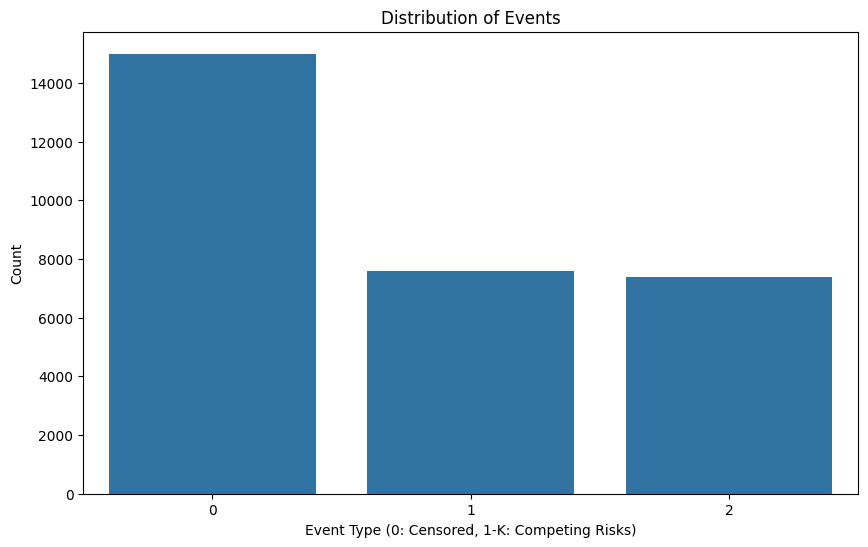

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Events')
plt.xlabel('Event Type (0: Censored, 1-K: Competing Risks)')
plt.ylabel('Count')
plt.show()
    

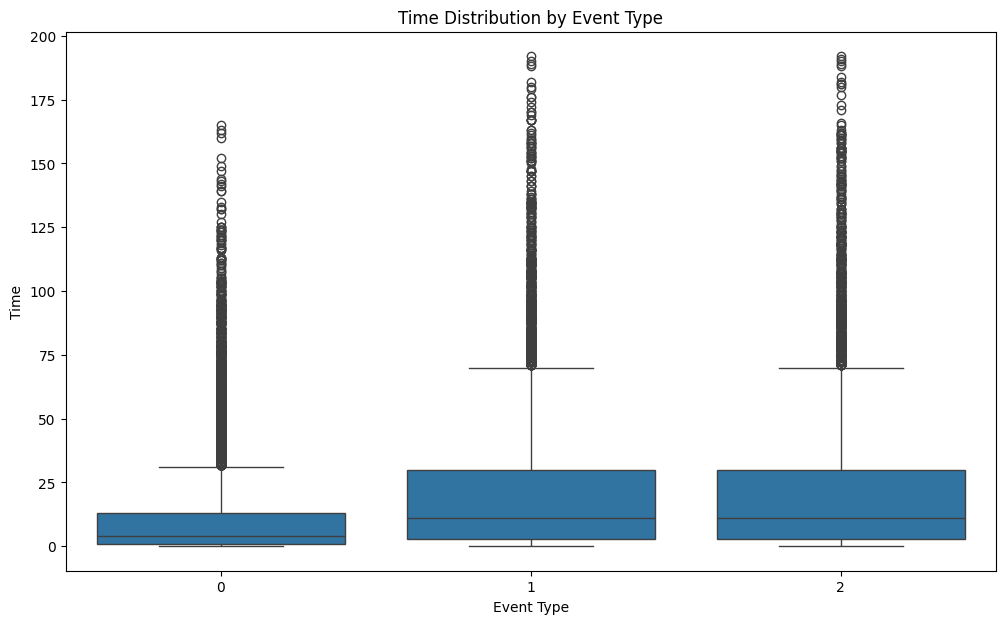

In [7]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='label', y='time', data=df)
plt.title('Time Distribution by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Time')
plt.show()

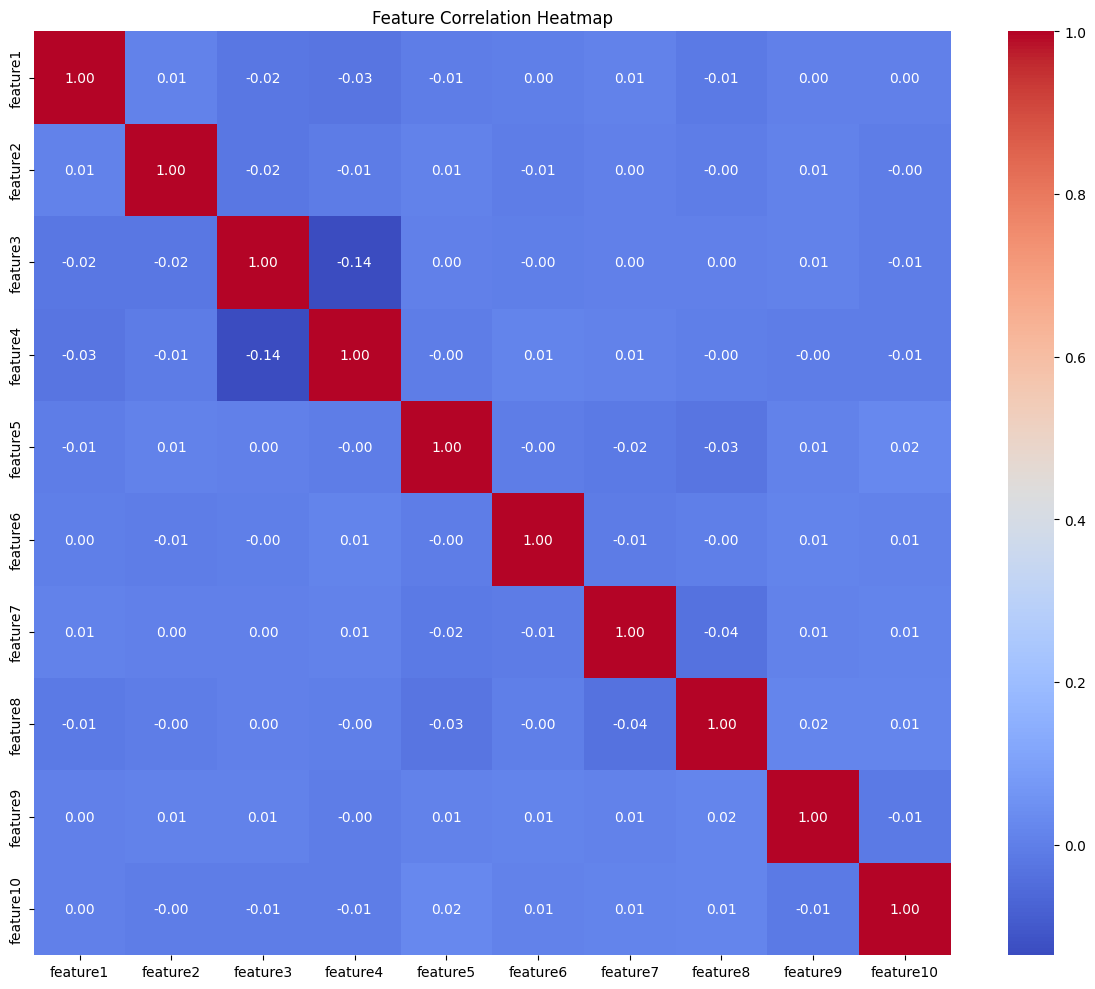

In [8]:
plt.figure(figsize=(12, 10))
feature_cols = df.columns[4:14]  # Select first 10 features
sns.heatmap(df[feature_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

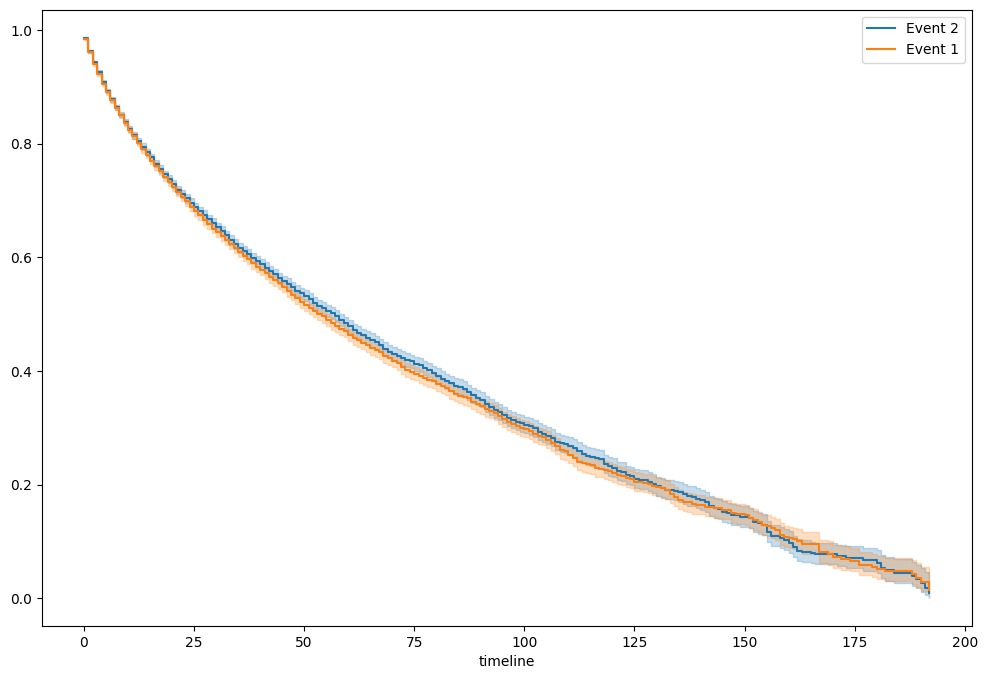

In [10]:
plt.figure(figsize=(12, 8))
for event_type in df['label'].unique():
    if event_type == 0:  # Skip censored for clarity in this plot
        continue
    
    # Create a binary indicator for this specific event
    event_indicator = (df['label'] == event_type).astype(int)
    
    # For KM curve, treat other events as censored
    kmf = KaplanMeierFitter()
    kmf.fit(df['time'], event_indicator, label=f'Event {event_type}')
    kmf.plot()

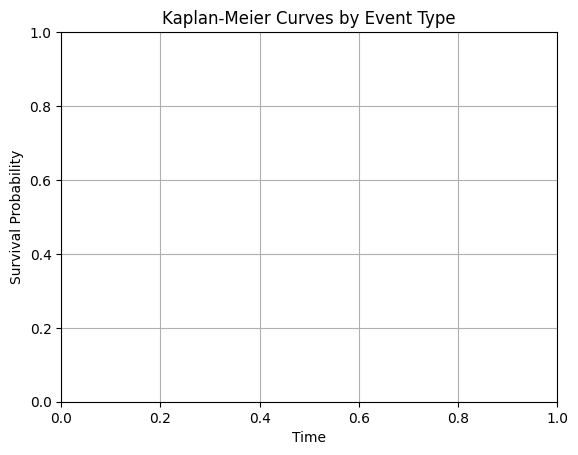

In [11]:
plt.title('Kaplan-Meier Curves by Event Type')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

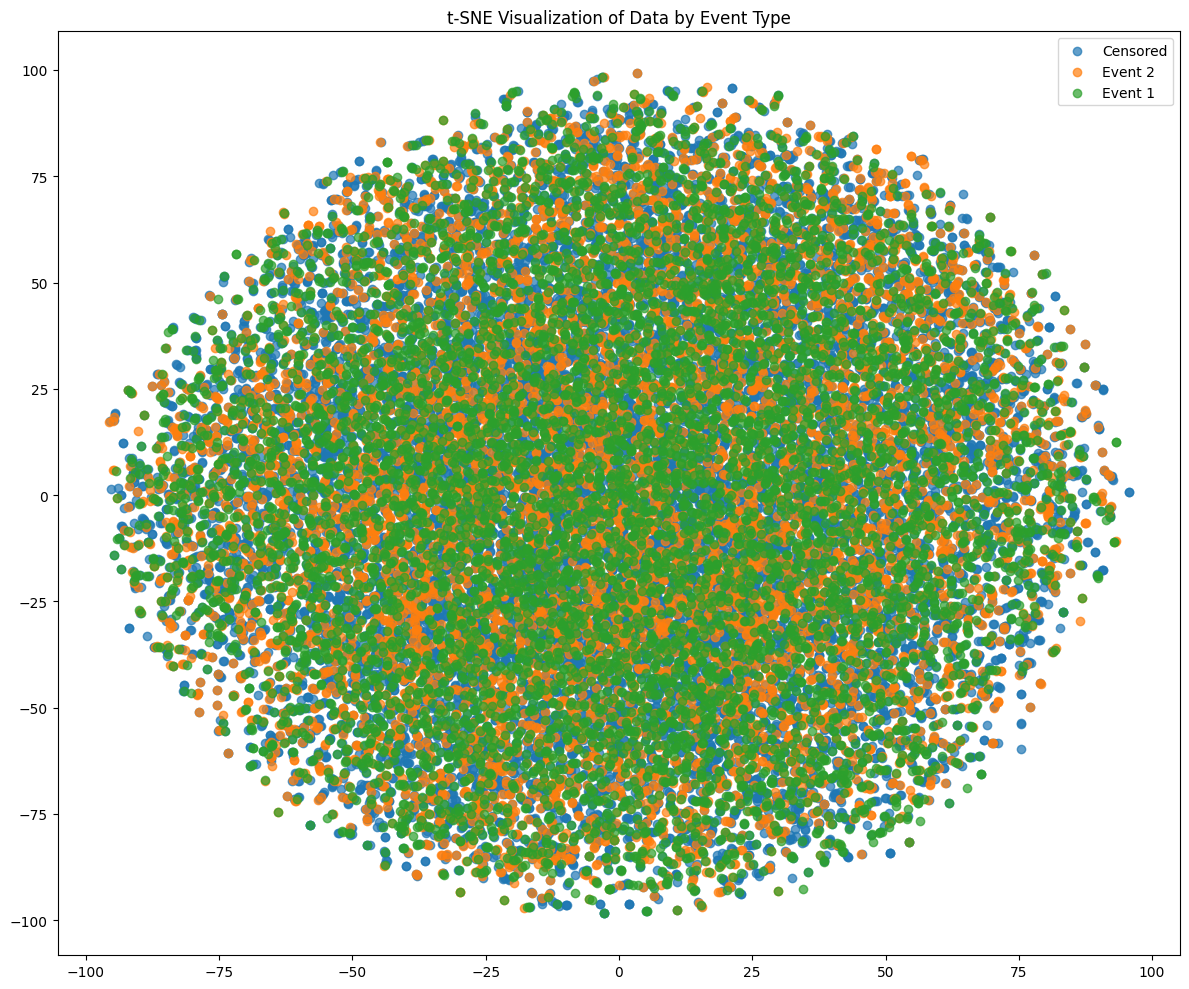

In [12]:
data = df.iloc[:, 4:].values  # Get feature data
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(data)

plt.figure(figsize=(12, 10))
for event_type in df['label'].unique():
    mask = df['label'] == event_type
    label = 'Censored' if event_type == 0 else f'Event {event_type}'
    plt.scatter(data_2d[mask, 0], data_2d[mask, 1], label=label, alpha=0.7)

plt.title('t-SNE Visualization of Data by Event Type')
plt.legend()
plt.tight_layout()
plt.show()
